In [10]:
import sys
from sbi import analysis as analysis
sys.path.append("/User/joseph/workspace/SimuRLacra/Pyrado/")
sys.path
#from ..eval_posterior import get_lunar_lander_true_data

['/Users/joseph/workspace/SimuRLacra/Pyrado/training_me/notebook',
 '/Users/joseph/miniconda3/envs/pyrado/lib/python38.zip',
 '/Users/joseph/miniconda3/envs/pyrado/lib/python3.8',
 '/Users/joseph/miniconda3/envs/pyrado/lib/python3.8/lib-dynload',
 '',
 '/Users/joseph/miniconda3/envs/pyrado/lib/python3.8/site-packages',
 '/home/wyx/workspace/SimuRLacra/Pyrado/',
 '~/workspace/SimuRLacra/Pyrado/',
 '/User/joseph/workspace/SimuRLacra/Pyrado/',
 '/User/joseph/workspace/SimuRLacra/Pyrado/',
 '/User/joseph/workspace/SimuRLacra/Pyrado/',
 '/User/joseph/workspace/SimuRLacra/Pyrado/']

In [13]:
from training_me.eval_posterior import eval_vi_posterior, eval_rejection_posterior, get_true_data
env_name = "cth"
get_true_data(env_name)

ImportError: attempted relative import with no known parent package

In [3]:
ex_dir = "/home/wyx/workspace/SimuRLacra/Pyrado/training_me/" + env_name
sample_num = 100000
theta, x_o = get_true_data(env_name)

Parameters: tensor([5.]), Real data: tensor([[-1.8420e-01, -4.3113e+00,  3.4398e+02, -5.3831e-01,  3.2746e+02, -6.0478e+00,  7.8356e-04,  9.4278e-03, -1.7118e-02,  5.5713e-04,  3.2675e-01,  3.4369e-01]])


Loss: -9.63Std: 0.01:  14%|█████████████████▎                                                                                                     | 290/2000 [00:06<00:35, 48.24it/s]


Converged with loss: -9.63


Loss: -9.63Std: 0.01:  15%|█████████████████▎                                                                                                     | 291/2000 [00:06<00:39, 43.26it/s]


Quality Score: 0.191 	 Good: Smaller than 0.5  Bad: Larger than 1.0 	         NOTE: Less sensitive to mode collapse.
Posterior mean: [5.1018863], time cost: 0.04986143112182617


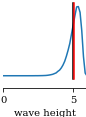

In [4]:
posterior_samples = eval_vi_posterior(ex_dir, f"snvi_posterior_0.pt", sample_num, x_o)
mean = posterior_samples.mean()
# plot posterior samples
fig, axes = analysis.pairplot(posterior_samples,
                      limits=[[0, 6]],
                      points=[theta, mean],
                      labels=["wave height"],
                      points_colors=["black", "red"],
                      diag=['kde'],
                      figsize=(1.5,1.5))
fig.savefig(ex_dir + "/snvi_posterior_{0}.pdf".format(theta.detach().item()), transparent=True)

In [5]:
import torch
abs_error = 0.
square_error = 0.
for sample in posterior_samples:
    error = theta - sample
    abs_error += torch.abs(error).sum()
    square_error += torch.pow(error, 2).sum()
abs_error /= len(posterior_samples)
square_error /= len(posterior_samples)
print("Abs error: {0}, Square error: {1}".format(abs_error, square_error))

Abs error: 1.0314840078353882, Square error: 1.7049458026885986


Drawing 100000 posterior samples: 100159it [00:00, 558446.20it/s]               


Posterior mean: [3.7336357], time cost: 0.18320631980895996


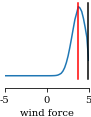

In [6]:
posterior_samples = eval_rejection_posterior(ex_dir, f"rejection_posterior_0.pt", sample_num, x_o)
mean = posterior_samples.mean()
# plot posterior samples
fig, axes = analysis.pairplot(posterior_samples,
                      limits=[[-5, 5]],
                      points=[theta, mean],
                      labels=["wind force"],
                      points_colors=["black", "red"],
                      diag=['kde'],
                      figsize=(1.5,1.5))
fig.savefig(ex_dir + "/rejection_posterior_{0}.pdf".format(theta.detach().item()), transparent=True)

In [7]:
abs_error = 0.
square_error = 0.
for sample in posterior_samples:
    error = theta - sample
    abs_error += torch.abs(error).sum()
    square_error += torch.pow(error, 2).sum()
abs_error /= len(posterior_samples)
square_error /= len(posterior_samples)
print("Abs error: {0}, Square error: {1}".format(abs_error, square_error))

Abs error: 1.246439814567566, Square error: 2.0649526119232178
